In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read inputs

train and test together in one df

In [157]:
files = ["./raw_files/train.csv", "./raw_files/test.csv"]

dfs = []

for file in files:
    dfs.append(pd.read_csv(file,delimiter=","))

data = pd.concat(dfs,keys=["train","test"])

In [158]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Recover missing values

## Age

In [159]:
data[data["Age"].isna()==True]

PassengerId  Survived  Pclass                             Name  \
train 5              6       0.0       3                 Moran, Mr. James   
      17            18       1.0       2     Williams, Mr. Charles Eugene   
      19            20       1.0       3          Masselmani, Mrs. Fatima   
      26            27       0.0       3          Emir, Mr. Farred Chehab   
      28            29       1.0       3    O'Dwyer, Miss. Ellen "Nellie"   
...                ...       ...     ...                              ...   
test  408         1300       NaN       3  Riordan, Miss. Johanna Hannah""   
      410         1302       NaN       3           Naughton, Miss. Hannah   
      413         1305       NaN       3               Spector, Mr. Woolf   
      416         1308       NaN       3              Ware, Mr. Frederick   
      417         1309       NaN       3         Peter, Master. Michael J   

              Sex  Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
train 5      male  NaN      0      0     330877   8.4583   NaN        Q  
      17     male  NaN      0      0     244373  13.0000   NaN        S  
      19   female  NaN      0      0       2649   7.2250   NaN        C  
      26     male  NaN      0      0       2631   7.2250   NaN        C  
      28   female  NaN      0      0     330959   7.8792   NaN        Q  
...           ...  ...    ...    ...        ...      ...   ...      ...  
test  408  female  NaN      0      0     334915   7.7208   NaN        Q  
      410  female  NaN      0      0     365237   7.7500   NaN        Q  
      413    male  NaN      0      0  A.5. 3236   8.0500   NaN        S  
      416    male  NaN      0      0     359309   8.0500   NaN        S  
      417    male  NaN      1      1       2668  22.3583   NaN        C  

[263 rows x 12 columns]

In [160]:
data.groupby(by=["Pclass","Sex","Parch"], dropna=True)["Age"].median()

Pclass  Sex     Parch
1       female  0        35.0
                1        44.5
                2        23.5
                3        48.0
                4        60.0
        male    0        42.0
                1        49.0
                2        17.0
                3        61.0
                4        64.0
2       female  0        29.0
                1        23.0
                2        23.0
                3        36.0
        male    0        30.0
                1        23.0
                2        25.0
3       female  0        22.0
                1         9.0
                2        11.0
                3        36.0
                4        37.0
                5        39.0
                6        43.0
                9         NaN
        male    0        26.0
                1         9.0
                2         9.5
                3        16.0
                4        40.0
                5        39.5
                6        40.0
                9 

In [161]:
data["Age_filled"] = data.groupby(by=["Pclass","Sex","Parch"], group_keys=False)["Age"].apply(lambda x: x.fillna(x.mean()))

In [162]:
data[data["Age_filled"].isna()==True]

PassengerId  Survived  Pclass                            Name  \
test 342         1234       NaN       3           Sage, Mr. John George   
     365         1257       NaN       3  Sage, Mrs. John (Annie Bullen)   

             Sex  Age  SibSp  Parch    Ticket   Fare Cabin Embarked  \
test 342    male  NaN      1      9  CA. 2343  69.55   NaN        S   
     365  female  NaN      1      9  CA. 2343  69.55   NaN        S   

          Age_filled  
test 342         NaN  
     365         NaN

In [163]:
data.loc[data["PassengerId"]==1234,"Age_filled"] = 40
data.loc[data["PassengerId"]==1257,"Age_filled"] = 43

## Fare

In [164]:
data[data["Fare"].isna()==True]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
test,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,60.5


In [165]:
data.groupby(["Pclass","Sex","Embarked"], dropna=False)["Fare"].median()

Pclass  Sex     Embarked
1       female  C           83.15830
                Q           90.00000
                S           78.85000
                NaN         80.00000
        male    C           62.66875
                Q           90.00000
                S           35.50000
2       female  C           27.72080
                Q           12.35000
                S           23.00000
        male    C           15.04580
                Q           12.35000
                S           13.00000
3       female  C           14.45420
                Q            7.75000
                S           13.77500
        male    C            7.22920
                Q            7.75000
                S            8.05000
Name: Fare, dtype: float64

In [166]:
data["Fare_filled"] = data.groupby(["Pclass","Sex","Embarked"], dropna=False, group_keys=False)["Fare"].apply(lambda x: x.fillna(x.mean()))

In [167]:
data[data["PassengerId"]==1044]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Fare_filled
test,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,60.5,13.145977


## Cabin

In [168]:
# let's drop this one

## Embarked

In [169]:
# let's see prediction diff first before recovering this

## Pclass

In [170]:
data["Pclass_cat"] = data["Pclass"].map({1:'first',2:'second',3:'third'})
data.drop(columns=["Pclass"], inplace=True)

# Remove columns / null values

In [171]:
data.drop(columns=["Age","Fare","Cabin","Embarked","Ticket","Name","PassengerId"], inplace=True)

In [172]:
data.describe(include="all")

,Survived,Sex,SibSp,Parch,Age_filled,Fare_filled,Pclass_cat
count,891.000000,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,third
freq,NaN,843,NaN,NaN,NaN,NaN,709
mean,0.383838,NaN,0.498854,0.385027,29.622169,33.280086,NaN
std,0.486592,NaN,1.041658,0.865560,13.248062,51.741876,NaN
min,0.000000,NaN,0.000000,0.000000,0.170000,0.000000,NaN
25%,0.000000,NaN,0.000000,0.000000,22.000000,7.895800,NaN
50%,0.000000,NaN,0.000000,0.000000,28.236934,14.454200,NaN
75%,1.000000,NaN,1.000000,0.000000,37.000000,31.275000,NaN


# Remove extremal values

Age

(array([ 72.,  77., 284., 433., 186., 138.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

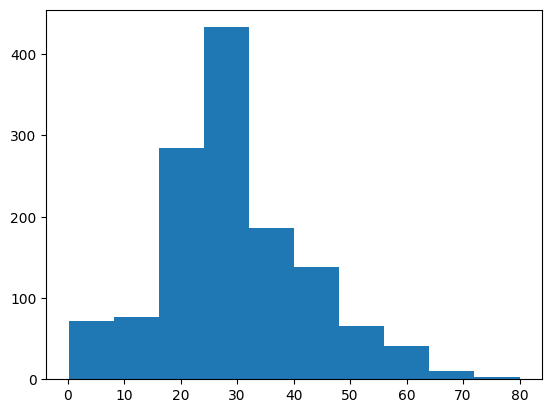

In [173]:
plt.hist(data["Age_filled"])

Fare

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

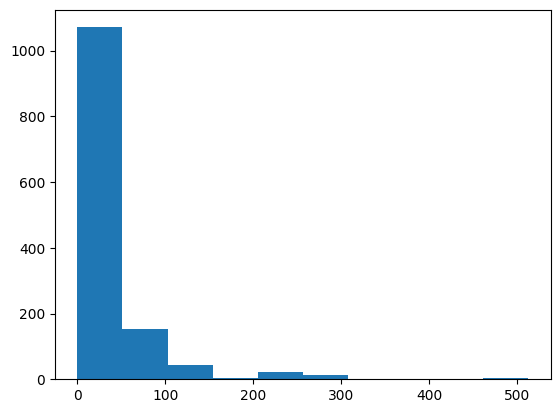

In [174]:
plt.hist(data["Fare_filled"])

In [175]:
data[data["Fare_filled"]>=data["Fare_filled"].quantile(0.999)]

Survived     Sex  SibSp  Parch  Age_filled  Fare_filled Pclass_cat
train 258       1.0  female      0      0        35.0     512.3292      first
      679       1.0    male      0      1        36.0     512.3292      first
      737       1.0    male      0      0        35.0     512.3292      first
test  343       NaN  female      0      1        58.0     512.3292      first

In [176]:
data.loc[data["Fare_filled"]>=data["Fare_filled"].quantile(0.999), "Fare_filled"] = 512.3292 / 4

# Categorical to Numerical

In [177]:
data_dummies = pd.get_dummies(data)

data_dummies

Survived  SibSp  Parch  Age_filled  Fare_filled  Sex_female  \
train 0         0.0      1      0   22.000000       7.2500           0   
      1         1.0      1      0   38.000000      71.2833           1   
      2         1.0      0      0   26.000000       7.9250           1   
      3         1.0      1      0   35.000000      53.1000           1   
      4         0.0      0      0   35.000000       8.0500           0   
...             ...    ...    ...         ...          ...         ...   
test  413       NaN      0      0   28.236934       8.0500           0   
      414       NaN      0      0   39.000000     108.9000           1   
      415       NaN      0      0   38.500000       7.2500           0   
      416       NaN      0      0   28.236934       8.0500           0   
      417       NaN      1      1   14.527027      22.3583           0   

           Sex_male  Pclass_cat_first  Pclass_cat_second  Pclass_cat_third  
train 0           1                 0                  0                 1  
      1           0                 1                  0                 0  
      2           0                 0                  0                 1  
      3           0                 1                  0                 0  
      4           1                 0                  0                 1  
...             ...               ...                ...               ...  
test  413         1                 0                  0                 1  
      414         0                 1                  0                 0  
      415         1                 0                  0                 1  
      416         1                 0                  0                 1  
      417         1                 0                  0                 1  

[1309 rows x 10 columns]

# Numerical to buckets

In [178]:
# let's skip this for now

# Split Train / Test

In [179]:
x_train, x_val, y_train, y_val = train_test_split(data_dummies.loc['train'].drop(columns="Survived")
                                                  , data_dummies.loc['train']["Survived"]
                                                  , train_size=0.9
                                                  , random_state=55
                                                  , shuffle = True)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((801, 9), (801,), (90, 9), (90,))

# Export data

export train / validation

In [180]:
np.savez("x_train.npz",x_train)
np.savez("y_train.npz",y_train)
np.savez("x_val.npz",x_val)
np.savez("y_val.npz",y_val)

export test data

In [181]:
np.savez("x_test.npz",data_dummies.loc['test'].drop(columns="Survived"))

export feature names

In [182]:
np.savez("feature_names.npz",list(data_dummies.drop(columns="Survived").columns.values))